# Social Media Sanctions and Misinformation Sharing   

by: **Miltos Tsolkas**   

There has been a lot of discussions on politics and sanctions in social media. Specifically, people with conservative beliefs argue that they are more likely to be sanctioned on social media than those with more liberal beliefs.

If this happens, however, that may not necessarily be the result of different policies on behalf of the social media companies. It may simply be that people with conservative beliefs post online more questionable content, and so they are more likely to be sanctioned even with a completely neutral sanction policy.

In a [recent analysis in Nature](https://www.nature.com/articles/s41586-024-07942-8), Mohshen Moshel et al. investigated whether social media sanctions are politically biased or they are the result of differences in misinformation sharing between people of different political beliefs. The authors argue that that media sanctions are not politically biased. Social media users with conservative political beliefs are more likely to post questionable or misinformation material, and so they are more likely to be sanctioned. We will follow through some of Moshel et al.'s research.

We will use their data, available at [mosleh_et_al_data.csv](mosleh_et_al_data.csv).

### Step 1: Importing 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Reading the data

It's time to read the .csv file and save the data into a variable. 

In [2]:
mosleh_and_al_data = pd.read_csv('mosleh_et_al_data.csv')

Let's see if there are any NaN values and in which columns they exist

In [ ]:
nan_count = mosleh_and_al_data.isnull().sum().sum()
print(nan_count)

3418


Okay, let's remove lines with NaN values

In [4]:
mosleh_and_al_data = mosleh_and_al_data.dropna()

Let's check again for NaNs

In [5]:
nan_count = mosleh_and_al_data.isnull().sum().sum()
print(nan_count)

0


Checking the first 10 lines

In [6]:
mosleh_and_al_data.head(10)

,politics_sites2,politics_sites1,politics_followed,lowqual_pr2019_crowd,lowqual_pr2019_fc,lowqual_afm,lowqual_mbfc,lowqual_lasser2019,suspended,politics_hashtag,...,valence_neg,valence_neu,valence_pos,politics_sites2_ideo_std,hashtag_ideo_std,barbera_std,politics_sites1_std,repeated_tweet_count,freq_pr_1h,bad_domain_count
0,-0.231902,-1.168745,-0.080295,0.598883,0.279221,0.185315,0.292807,0.350000,0,0,...,0.109935,0.813230,0.076835,0.274317,0.0,0.909460,69,86.0,30,7
1,0.405261,1.060905,2.296375,0.774873,0.848639,0.614156,0.513147,0.975087,0,1,...,0.115985,0.793715,0.090250,0.351800,0.0,0.157056,623,133.0,26,20
2,-0.171067,-0.500076,-2.312730,0.548727,0.242347,0.130950,0.242445,0.300000,0,0,...,0.085765,0.817340,0.096915,0.279591,0.0,0.445349,32,3.0,3,6
3,-0.085814,-0.748035,-1.507481,0.611501,0.360119,0.180055,0.277793,0.316038,0,0,...,0.108680,0.781135,0.110190,0.290277,0.0,0.256665,55,104.0,29,22
4,0.595367,1.347730,2.010573,0.700217,0.698661,0.430655,0.554609,0.763889,0,1,...,0.065145,0.860550,0.074320,0.300823,0.0,0.431149,37,36.0,8,8
5,0.506015,1.186405,1.793259,0.718102,0.731673,0.450803,0.522619,0.772000,0,1,...,0.055340,0.837295,0.107375,0.263269,0.0,0.785494,122,6.0,5,42
6,0.542000,0.997039,1.886825,0.760590,0.818681,0.385627,0.428575,0.721154,0,1,...,0.061355,0.835380,0.103255,0.275407,0.0,0.609629,29,202.0,31,10
7,0.477531,0.708345,1.641415,0.710686,0.697704,0.331789,0.482054,0.687500,0,1,...,0.074845,0.850990,0.074175,0.385703,0.0,0.614331,43,6.0,10,7
8,-0.199407,-1.121910,-1.860943,0.541776,0.155134,0.180074,0.255425,0.350000,0,0,...,0.071145,0.854920,0.073950,0.228707,0.0,0.345586,63,5.0,9,6
9,-0.135356,-0.803734,-1.289331,0.555324,0.108036,0.133371,0.289695,0.330357,0,0,...,0.076440,0.776510,0.147055,0.193758,0.0,0.309698,69,1804.0,24,0


In [7]:
mosleh_and_al_data.shape

(7286, 42)

We can see that there are **42 columns**. Let's see their names:

In [8]:
columns = list(mosleh_and_al_data.columns)

for i in range(0, len(columns), 7):
    print(columns[i:i + 7])

['politics_sites2', 'politics_sites1', 'politics_followed', 'lowqual_pr2019_crowd', 'lowqual_pr2019_fc', 'lowqual_afm', 'lowqual_mbfc']
['lowqual_lasser2019', 'suspended', 'politics_hashtag', 'lowqual_pr2019_crowdrep', 'num_followers', 'num_friends', 'tweets_in_2wk']
['botsentinel_score', 'rewire_abuse', 'rewire_hate', 'rewire_profanity', 'rewire_violent', 'rewire_sexually_explicit', 'jigsaw_toxicity']
['jigsaw_severe_toxicity', 'jigsaw_idenity_attack', 'jigsaw_insult', 'jigsaw_profanity', 'jigsaw_threat', 'rocklage_valence_std', 'rocklage_extremity_std']
['rocklage_emotionality_std', 'rocklage_certainty_std', 'liwc_political', 'moral_outrage', 'valence_neg', 'valence_neu', 'valence_pos']
['politics_sites2_ideo_std', 'hashtag_ideo_std', 'barbera_std', 'politics_sites1_std', 'repeated_tweet_count', 'freq_pr_1h', 'bad_domain_count']


Interesting! Now we have read all of our data.

## Twitter Suspensions after the 2020 Election

We will show, using crosstabulation, that accounts that shared `#Trump2020` during the election were about 4.4 times more likely to be subsequently suspended than the accounts that shared `#VoteBidenHarris2020` (relevant columns: `politics_hashtag` and `suspended`). Then we will perform a $\chi^2$ test on the contingency table and explain the results.  

**about the columns:**  

* `politics_hashtag`  
This column identifies the political hashtag shared by the user during the 2020 U.S. presidential election. 
* `suspended`  
This column indicates whether the user's Twitter account was suspended as of the follow-up date (July 2021).

Let's check the datatypes of the values of the two columns we're interested in...

In [9]:
print(f"Politics Hashtag datatype: {mosleh_and_al_data.politics_hashtag.dtype}\nSuspended datatype: {mosleh_and_al_data.suspended.dtype}")

Politics Hashtag datatype: int64
Suspended datatype: int64


Let's see how many of our `politics_hashtag` values are equal to 0 and how many are equal to 1

In [10]:
print(f"Number of Ones: {len(mosleh_and_al_data.loc[mosleh_and_al_data['politics_hashtag']==1, 'politics_hashtag'])}")
print(f"Number of Zeros: {len(mosleh_and_al_data.loc[mosleh_and_al_data['politics_hashtag']==0, 'politics_hashtag'])}")

Number of Ones: 3422
Number of Zeros: 3864


We can see that they are almost equally devided. The question is:  

*does `politics_hashtag = 0` represent that the hashtag shared is `#Trump2020` and `politics_hashtag = 1` means that the hashtag shared is `#VoteBidenHarris2020`, or is it the opposite?*   
 
Similarly the following qestion arises:  

*does `suspended = 0` represent that the user got suspended and `suspended = 0` means that the didn't get suspended, or is it the opposite?*   
  
It is stated on the researched linked above that:
> only 4.5% of the users who shared Biden hashtags had been suspended as of July 2021,  
> 19.6% of the users who shared Trump hashtags had been suspended  
  
So if we find the combinations of on both columns that resonate with the percentages this finding we will understand which is which.

In [11]:
counts_ph, counts_s  = mosleh_and_al_data['politics_hashtag'].value_counts(), mosleh_and_al_data['suspended'].value_counts()
ph_ones, ph_zeros, s_ones, s_zeros = counts_ph[1], counts_ph[0], counts_s[1], counts_s[0]

print(f"percentage of suspended=0 for politics_hashtag=0: {((len(mosleh_and_al_data.loc[(mosleh_and_al_data['politics_hashtag'] == 0) & (mosleh_and_al_data['suspended'] == 0), 'politics_hashtag']))/(len(mosleh_and_al_data.loc[mosleh_and_al_data['politics_hashtag']==0, 'politics_hashtag'])))*100}")
print(f"percentage of suspended=1 for politics_hashtag=0: {((len(mosleh_and_al_data.loc[(mosleh_and_al_data['politics_hashtag'] == 0) & (mosleh_and_al_data['suspended'] == 1), 'politics_hashtag']))/(len(mosleh_and_al_data.loc[mosleh_and_al_data['politics_hashtag']==0, 'politics_hashtag'])))*100}")
print(f"percentage of suspended=0 for politics_hashtag=1: {((len(mosleh_and_al_data.loc[(mosleh_and_al_data['politics_hashtag'] == 1) & (mosleh_and_al_data['suspended'] == 0), 'politics_hashtag']))/(len(mosleh_and_al_data.loc[mosleh_and_al_data['politics_hashtag']==1, 'politics_hashtag'])))*100}")
print(f"percentage of suspended=1 for politics_hashtag=1: {((len(mosleh_and_al_data.loc[(mosleh_and_al_data['politics_hashtag'] == 1) & (mosleh_and_al_data['suspended'] == 1), 'politics_hashtag']))/(len(mosleh_and_al_data.loc[mosleh_and_al_data['politics_hashtag']==1, 'politics_hashtag'])))*100}")

percentage of suspended=0 for politics_hashtag=0: 96.32505175983437
percentage of suspended=1 for politics_hashtag=0: 3.674948240165631
percentage of suspended=0 for politics_hashtag=1: 81.41437755698422
percentage of suspended=1 for politics_hashtag=1: 18.58562244301578


We can see that the columns seem to behave accordingly to the statement of the report. So it is clear that:  
* When `politics_hashtag` = 0, the shared hashtag was `#VoteBidenHarris2020`
* When `politics_hashtag` = 1,  the shared hashtag was  `#Trump2020`
* When `suspended` = 1, the user was suspended
* When `suspended` = 0, the user was not suspended  
  
We will prove using crosstabulation, that accounts that shared `#Trump2020` during the election were about 4.4 times more likely to be subsequently suspended than the accounts that shared `#VoteBidenHarris2020`

### Step 1: Creation of Contingency Table

In [12]:
crosstab = pd.crosstab(mosleh_and_al_data['politics_hashtag'],
                        mosleh_and_al_data['suspended'],
                        margins=True,
                        margins_name='Total')

styled_crosstab = (
    crosstab.style
    .set_table_styles([
        {"selector": "thead th", "props": [("background-color", "lightblue"), ("font-weight", "bold"), ("text-align", "center")]},
        {"selector": "tbody th", "props": [("background-color", "lightblue"), ("font-weight", "bold"), ("text-align", "center")]},
    ])
    .set_caption("Suspensions by Political Hashtag")
)
print("Suspended:\n\t0= False, 1=True\nHashtag:\n\t0 = #VoteBidenHarris2020, 1 = #Trump2020")
styled_crosstab

Suspended:
	0= False, 1=True
Hashtag:
	0 = #VoteBidenHarris2020, 1 = #Trump2020


suspended,0,1,Total
politics_hashtag,,,
0,3722,142,3864
1,2786,636,3422
Total,6508,778,7286


### Step 2: Proving the Likelihood of Suspension

We will calculate suspension rates for `#Trump2020` and `#VoteBidenHarris2020` by dividing suspended accounts by total accounts for each hashtag, then compute the ratio to show how much more likely `#Trump2020` accounts were to be suspended.

In [13]:
trump_s = crosstab.loc[1, 1]  
trump_total = crosstab.loc[1, 'Total']  

bidenharris_s = crosstab.loc[0, 1]  
biden_total = crosstab.loc[0, 'Total']  

trump_s_rate = trump_s / trump_total
biden_s_rate = bidenharris_s / biden_total

suspension_ratio = trump_s_rate / biden_s_rate

print(f"Suspension rate for #Trump2020: {trump_s_rate:.4f}")
print(f"Suspension rate for #VoteBidenHarris2020: {biden_s_rate:.4f}")
print(f"Accounts sharing #Trump2020 were about {suspension_ratio:.1f} times more likely to be suspended.")

Suspension rate for #Trump2020: 0.1859
Suspension rate for #VoteBidenHarris2020: 0.0367
Accounts sharing #Trump2020 were about 5.1 times more likely to be suspended.


### Step 3:     Perform a $\chi^2$ test on the contingency table
We use scipy.stats for statistical computations, and chi2_contingency specifically performs a Chi-square test to evaluate if there is a significant association between two categorical variables.

**What is a Chi-Square Test:**  
We compare the expected behaviour of our data to the actual data. That way we can see if the variation in our data is due to chance or if it is due to one of our variables (here the hashtag shared).

**What is the Chi-Square Test Formula:**   
   
$$ \chi^2 = Σ(\frac{Oᵢ - Eᵢ}{Eᵢ}) $$


- **\($\chi^2$)**: Chi-square statistic.
- **\(O_i\)**: Observed frequency in the contingency table.
- **\(E_i\)**: Expected frequency under the assumption of independence.

**What are the Degrees of Freedom in the Chi-Square Test**

The degrees of freedom (DoF) for a Chi-square test are calculated as:

$\text{DoF} = (\text{rows} - 1) \times (\text{columns} - 1)$

In our contigency table:
- **Rows**: 2 (politics_hashtag: 0, 1)
- **Columns**: 2 (suspended: 0, 1)  
  
so we have:

$\text{DoF} = (2 - 1) \times (2 - 1) = 1$

**What is the p-value and how does it relate to the Chi-Square Test?**

The **p-value** is the probability of obtaining a Chi-square statistic at least as extreme as the one observed, assuming that the null hypothesis is true (i.e., no association between the variables).  
A **low p-value** (typically < 0.05) suggests that the observed data is unlikely under the null hypothesis, leading us to reject it and conclude that there is a significant association between the variables. 




In [14]:
from scipy.stats import chi2_contingency
crosstab = crosstab.iloc[:-1, :-1]  # we remove the "Total" row and column

chi2, probability, degrees_of_freedom, expected = chi2_contingency(crosstab)

print("Chi-Square Test Results")
print("------------------------")
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-Value: {probability:.4e}")
print(f"Degrees of Freedom: {degrees_of_freedom}")
print("\nExpected Frequencies:")
print(pd.DataFrame(expected, index=crosstab.index, columns=crosstab.columns))

# Interpretation
if probability < 0.05:
    print("\nThe result is statistically significant (p < 0.05).")
    print("There is a significant association between the hashtag used and the likelihood of account suspension.")
else:
    print("\nThe result is not statistically significant (p >= 0.05).")
    print("There is no significant association between the hashtag used and the likelihood of account suspension.")

Chi-Square Test Results
------------------------
Chi-Square Statistic: 421.4706
P-Value: 1.1678e-93
Degrees of Freedom: 1

Expected Frequencies:
suspended                   0           1
politics_hashtag                         
0                 3451.401592  412.598408
1                 3056.598408  365.401592

The result is statistically significant (p < 0.05).
There is a significant association between the hashtag used and the likelihood of account suspension.


Indeed, the p-value we got is **much, much smaller than 0.05**. The output shows: `P-Value: 1.1678e-93` which means:      
   

`1.1678 × 10^-93 = 0.000…00011678`,     

with **92 zeros after the decimal point** before the 1.1678.   

Clearly: `1.1678 × 10^-93 << 5 × 10^-2`.

So yes, the p-value is **extremely small**, much smaller than 0.05.

## Distributions of Relative Frequency of Low Quality

We'll plot the distributions of low-quality sharing as determined by eight professional fact-checkers (column `lowqual_pr2019_fc`), grouped by `politics_hashtag`. The $x$-axis will be standardized using z-scores. 

**General Explanation of Z Score:**  
The z score of a value, here of a value of low-quality sharing as determined by eight professional fact-checkers, means *"How many standard derivations, is this value, away from the mean, for that variable"*.   
  
We have 3 cases:  
* z-score = 0 : value exact same as the mean
* z-score < 0 : value below the mean
* z-score > 0 : value above the mean
  
So basically the formula is:
$z = \frac{x - \bar{x}}{s}$
  
We will make a copy of our dataframe with the columns of our interest and we'll add a column with the standardized z scores to our copied dataframe.  
Then we will make our distributions plot.


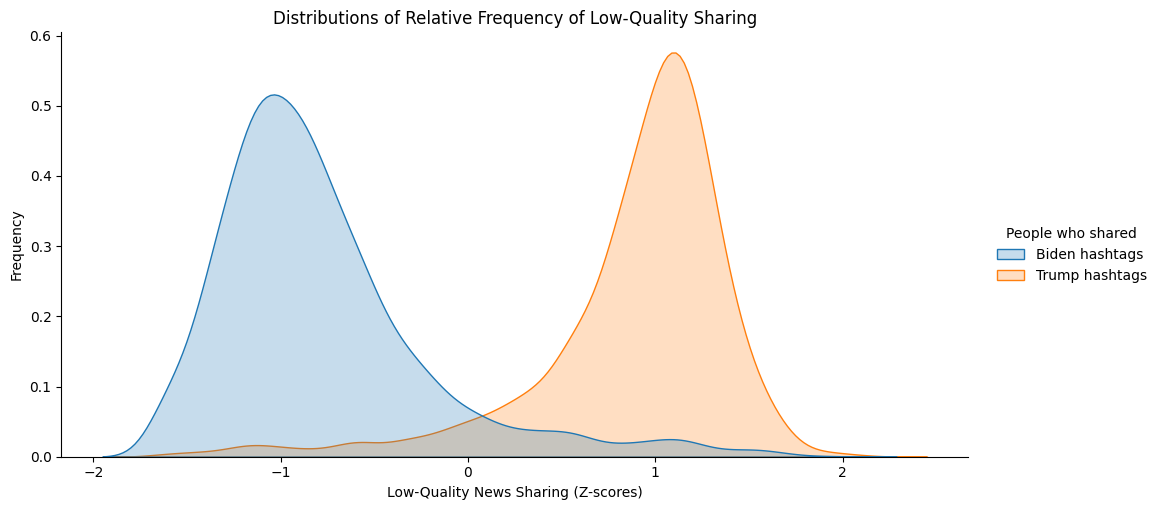

In [15]:
from scipy.stats import zscore

# making a new data frame only with the two columns that are of interest
distribution = mosleh_and_al_data[['politics_hashtag', 'lowqual_pr2019_fc']].copy()
distribution['politics_hashtag'] = distribution['politics_hashtag'].map({1: "Trump hashtags", 0: "Biden hashtags"})

# adding a column that will contain the standardized z scores
distribution['lowqual_pr2019_fc_z'] = (distribution['lowqual_pr2019_fc'] - distribution['lowqual_pr2019_fc'].mean()) / distribution['lowqual_pr2019_fc'].std()

plot = sns.displot(
    x="lowqual_pr2019_fc_z", 
    data=distribution, 
    hue="politics_hashtag",  # groups by 'politics_hashtag' for separate curves
    kind="kde", # shows a smooth, continuous curve representing the probability density of the data
    fill=True,  # fills the area under the curves
    aspect=2
)

plot._legend.set_title("People who shared")
plt.title("Distributions of Relative Frequency of Low-Quality Sharing")
plt.xlabel("Low-Quality News Sharing (Z-scores)")
plt.ylabel("Frequency")

plt.show()

Having done, that, we will proceed to do the same with low-quality sharing as determined by crowdsourcing from 971 participants from the USA (column `lowqual_pr2019_crowd`).  

We will use the same logic and work on the same copy of our dataframe.

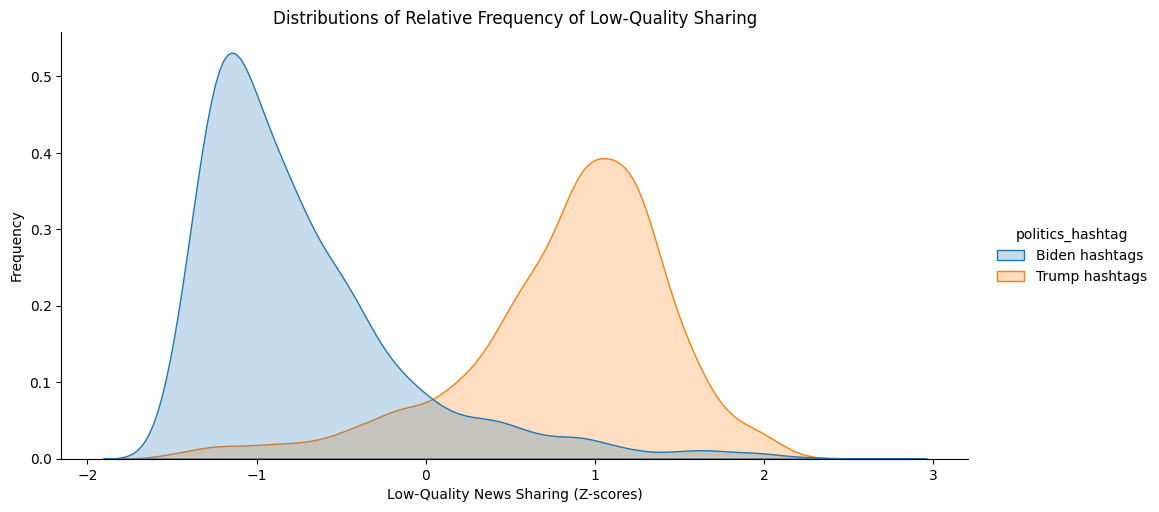

In [16]:
distribution['lowqual_pr2019_crowd'] = mosleh_and_al_data['lowqual_pr2019_crowd'].copy()
distribution['lowqual_pr2019_crowd'] = (distribution['lowqual_pr2019_crowd'] - distribution['lowqual_pr2019_crowd'].mean()) / distribution['lowqual_pr2019_crowd'].std()

plot2 = sns.displot(
    x="lowqual_pr2019_crowd", 
    data=distribution, 
    hue="politics_hashtag",  # groups by 'politics_hashtag' for separate curves
    kind="kde", # shows a smooth, continuous curve representing the probability density of the data
    fill=True,  # fills the area under the curves
    aspect=2
)

plot._legend.set_title("People who shared")
plt.title("Distributions of Relative Frequency of Low-Quality Sharing")
plt.xlabel("Low-Quality News Sharing (Z-scores)")
plt.ylabel("Frequency")

plt.show()


## Low-quality News Sharing on Twitter

We will proceed to examine low-quality news sharing on Twitter on a more quantitave manner, using the t-test. In particular, we will use the t-test based on groups of users depending on their `politics_hashtag` and various assessments of low-quality news sharing. We will quantify the effect size of the t-test using Cohen's $d$ and Hedges' $g$.

Cohen's $d$ is defined as the difference between two means divided by a standard deviation for the data, i.e.:

$$ d = \frac{\bar{x}_{1} - \bar{x}_{2}}{s} $$

$s$, the pooled standard deviation for two independent samples is defined as:

$$ s=\sqrt{\frac{(n_{1}-1)s_{1}^{2}+(n_{2}-1)s_{2}^{2}}{n_{1}+n_{2}-2}} $$

where $n_1$, $n_2$ is the size of each sample and the variance of $s_1$ is defined as:

$$ s_{1}^{2}=\frac{1}{n_{1}-1} \sum _{i=1}^{n_{1}}(x_{1,i}-{\bar {x}}_{1})^{2} $$

with the variance of $s_2$ defined similarly. The values of Cohen's $d$ can be interpreted as follows:

| Effect Size | $d$  |
|-------------|------|
| Very small  | 0.01 |
| Small	      | 0.20 |
| Medium	  | 0.50 |
| Large	      | 0.80 |
| Very large  | 1.20 |
| Huge        | 2.00 |

Hedges' $g$ corrects Cohen's $d$ for bias in small sample sizes and is defined as:

$$ 1 - \bigg(\frac{3}{4  (n_1 + n_2) - 9)}\bigg)d $$

We will perform a t-test statistic and report Cohen's $d$ and Hedges' $g$ for the following, grouped by `politics_hashtag`.

* `lowqual_pr2019_fc` (sites rated by fact-checkers)
* `lowqual_afm` (sites rated by Ad Fontes media, <https://adfontesmedia.com/>)
* `lowqual_mbfc` (sites rated by Media Bias/Fact Check, <https://mediabiasfactcheck.com/>)
* `lowqual_lasser2019` (sites rated by Laser et al., https://doi.org/10.1093/pnasnexus/pgac186)
* `lowqual_pr2019_crowd` (sites rated by crowdsourcing 971 participants from the USA)
* `lowqual_pr2019_crowdrep` (sites rated by the republicans among the 971 participants of above)

Firstly we will create a few functions to help us later on.  
We won't need to create a function for standard derivation because the .std() method of the pandas library calculates it with the same formula.  
We will use an independent t-test rather than a paired t-test because we're comparing the means of two independent groups of users depending on their `politics_hashtag` and various assessments of low-quality news sharing.   
  
The formula for independent **T-Testing** is the following:  
$$
t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
$$ 


In [17]:
from scipy import stats

# function that calculates the pooled standard deviation
def pooled_sd(n1, s1, n2, s2):
    return np.sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))

# function that calculates Cohen's d
def cohen_d(mean1, mean2, sd_pooled):
    return (mean1 - mean2) / sd_pooled

# function that calculate Hedges' g
def hedges_g(d, n1, n2):
    return d * (1 - (3 / (4 * (n1 + n2) - 9)))

def independent_t_stat(mean1, mean2, sd1, sd2, n1, n2):
    return (mean1 - mean2) / (np.sqrt((sd1**2 / n1) + (sd2**2 / n2)))


def analyze_low_quality(df, column):
    group1 = mosleh_and_al_data[mosleh_and_al_data['politics_hashtag'] == 1][column]
    group2 = mosleh_and_al_data[mosleh_and_al_data['politics_hashtag'] == 0][column]
    
    # means, sample sizes and sds calculation
    mean1 = group1.mean()
    mean2 = group2.mean()
    sd1 = group1.std()
    sd2 = group2.std()
    n1 = group1.shape[0]
    n2 = group2.shape[0]

    # performing the t-test
    t_stat = independent_t_stat(mean1, mean2, sd1, sd2, n1, n2)

    # degrees of freedom for the independent t-test
    df = n1 + n2 - 2
    
    # pooled standard deviation
    sd_pooled = pooled_sd(n1, sd1, n2, sd2)

    # Cohen's d
    d = cohen_d(mean1, mean2, sd_pooled)

    # Hedges' g
    g = hedges_g(d, n1, n2)

    return {
        't_stat': t_stat,
        'cohen_d': d,
        'hedges_g': g
    }

Now that we have our functions defined, we will perform the analysis for each of the stated above columns.

In [18]:
columns_to_analyze = [
    'lowqual_pr2019_fc', 'lowqual_afm', 'lowqual_mbfc',
    'lowqual_lasser2019', 'lowqual_pr2019_crowd', 'lowqual_pr2019_crowdrep'
]

results = {}
for column in columns_to_analyze:
    results[column] = analyze_low_quality(mosleh_and_al_data, column)

results_df = pd.DataFrame(results).T
results_df

,t_stat,cohen_d,hedges_g
lowqual_pr2019_fc,130.915695,3.057153,3.056838
lowqual_afm,109.531879,2.609463,2.609194
lowqual_mbfc,100.681486,2.344375,2.344134
lowqual_lasser2019,108.617273,2.618769,2.618499
lowqual_pr2019_crowd,108.776615,2.551942,2.551679
lowqual_pr2019_crowdrep,61.278247,1.437226,1.437078


#### Analysis of the results

**t_stat**  
    
For each column, the T Test (t_stat variable here), tells us whether there is a statistically significant difference between the means of two groups.  
For all of our columns, the t-statistic values are extremely high (e.g., 119.60 for `lowqual_pr2019_fc` or 61.27 for `lowqual_pr2019_crowdrep`).  
A **high t-statistic** suggests that **the difference in means between the two groups is very large** relative to what we would expect if there were no real difference between the groups.  
The larger the t-statistic (in absolute value), the less likely it is that the observed difference in means is due to random chance.  
These results strongly suggest that **the groups are statistically significantly different in all columns**.
  
**Cohen's d and Hedges' g** 
   
We can see that in most cases the two variables are fairly similar.  
The effect sizes of Cohen's d and Hedges' g indicate the magnitude of the difference between the two groups' means, with larger values suggesting a stronger or more meaningful difference in low-quality news sharing behavior.  
Using the table of interpretations of the different effect size values stated above we can see that we notice two categories of effect sizes:  
*  Very large  
Column `lowqual_pr2019_crowdrep` with cohen_d = 1.291555 and hedges_g = 1.291448, which are close to 1.20.  
* Huge  
All the other columns, with cohen_d and hedges_g values above 2.0.


## Sharing Lower-quality News Sources and Conservative Ideology

To see if there is a correlation between lower-quality news sources and conservative ideology, we will perform pairwise correlations between, on the one hand:

 * `lowqual_pr2019_fc`
 * `lowqual_lasser2019`
 * `lowqual_mbfc`
 * `lowqual_afm`
 * `lowqual_pr2019_crowd`
 * `lowqual_pr2019_crowdrep`

and on the other hand:

 * `politics_followed` (political ideology estimated on the basis of Twitter accounts user followed)
 * `politics_hashtag`
 * `politics_sites1` (political ideology estimated on the basis of the news sites the users share, <https://doi.org/10.1126/science.aau2706>)
 * `politics_sites2` (political ideology estimated on the basis of the news sites ther users share, <https://doi.org/10.31219/osf.io/ch8gj>)

We will first create a **correlation table**.  
A **correlation table** is a matrix that shows the strength and direction of the linear relationships between pairs of variables, with values ranging from -1 (perfect negative correlation) to +1 (perfect positive correlation).

In [19]:
correlation_df = mosleh_and_al_data[['lowqual_pr2019_fc', 'lowqual_lasser2019', 'lowqual_mbfc', 
                                     'lowqual_afm', 'lowqual_pr2019_crowd', 'lowqual_pr2019_crowdrep', 
                                     'politics_followed', 'politics_hashtag', 'politics_sites1', 'politics_sites2']].copy()

correlation_df = correlation_df.corr()
correlation_df

,lowqual_pr2019_fc,lowqual_lasser2019,lowqual_mbfc,lowqual_afm,lowqual_pr2019_crowd,lowqual_pr2019_crowdrep,politics_followed,politics_hashtag,politics_sites1,politics_sites2
lowqual_pr2019_fc,1.000000,0.871403,0.772122,0.887848,0.966151,0.795272,0.807597,0.836404,0.880159,0.859007
lowqual_lasser2019,0.871403,1.000000,0.822830,0.906733,0.850479,0.680396,0.779873,0.794237,0.848869,0.864055
lowqual_mbfc,0.772122,0.822830,1.000000,0.801913,0.727969,0.558676,0.747274,0.760225,0.790331,0.792920
lowqual_afm,0.887848,0.906733,0.801913,1.000000,0.862526,0.704555,0.770213,0.793191,0.850432,0.840178
lowqual_pr2019_crowd,0.966151,0.850479,0.727969,0.862526,1.000000,0.890095,0.753201,0.786570,0.817428,0.791918
lowqual_pr2019_crowdrep,0.795272,0.680396,0.558676,0.704555,0.890095,1.000000,0.540025,0.582906,0.582480,0.559472
politics_followed,0.807597,0.779873,0.747274,0.770213,0.753201,0.540025,1.000000,0.861470,0.878954,0.860582
politics_hashtag,0.836404,0.794237,0.760225,0.793191,0.786570,0.582906,0.861470,1.000000,0.879236,0.857461
politics_sites1,0.880159,0.848869,0.790331,0.850432,0.817428,0.582480,0.878954,0.879236,1.000000,0.938906
politics_sites2,0.859007,0.864055,0.792920,0.840178,0.791918,0.559472,0.860582,0.857461,0.938906,1.000000


Let's modify the dataframe to only keep the pairs we care about

In [20]:
correlation_df = correlation_df.drop(['lowqual_pr2019_fc', 'lowqual_lasser2019', 'lowqual_mbfc', 'lowqual_afm', 'lowqual_pr2019_crowd', 'lowqual_pr2019_crowdrep'], axis=1)
correlation_df = correlation_df.drop(['politics_followed', 'politics_hashtag', 'politics_sites1', 'politics_sites2'], axis=0)

correlation_df

,politics_followed,politics_hashtag,politics_sites1,politics_sites2
lowqual_pr2019_fc,0.807597,0.836404,0.880159,0.859007
lowqual_lasser2019,0.779873,0.794237,0.848869,0.864055
lowqual_mbfc,0.747274,0.760225,0.790331,0.792920
lowqual_afm,0.770213,0.793191,0.850432,0.840178
lowqual_pr2019_crowd,0.753201,0.786570,0.817428,0.791918
lowqual_pr2019_crowdrep,0.540025,0.582906,0.582480,0.559472


Now, let's  display the results in a **heatmap**

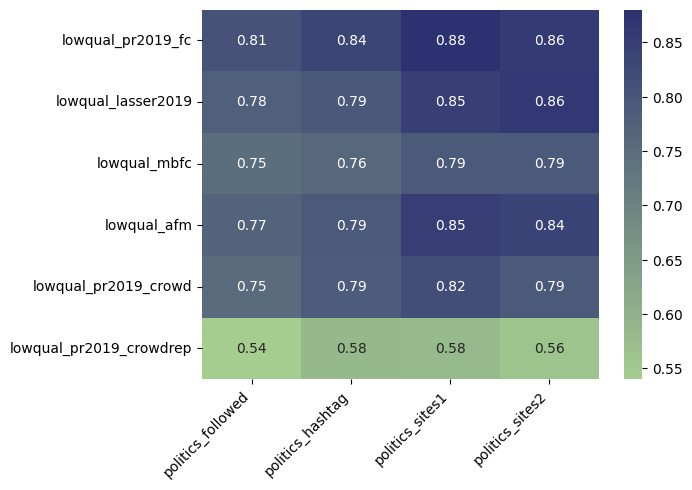

In [21]:
# modifying the colors (not a necessary step)
from matplotlib.colors import LinearSegmentedColormap
colors = [ "#a5cd90","#2c3172"]
custom_cmap = LinearSegmentedColormap.from_list("custom_green_blue", colors)

sns.heatmap(correlation_df, annot=True, cmap=custom_cmap, fmt=".2f")
plt.xticks(rotation=45, ha='right') # slight rotation of the titles  

plt.show()

## News Sharing Can Help Explain Suspension, Using Single Predictors

We will use the following predictors to predict whether a user was suspended or not:

  * `politics_hashtag`
  * `politics_sites1`
  * `politics_sites2`
  * `politics_followed`
  * `lowqual_afm`
  * `lowqual_mbfc`
  * `lowqual_lasser2019`
  * `lowqual_pr2019_fc`
  * `lowqual_pr2019_crowd`

The predictions will be with a probit model. The probit model is an alternative to logit, but while the latter uses the logit as the *link function*, the probit model uses the inverse of the cumulative distribution function (CDF) of the standard normal distribution (denoted as $\Phi^{-1}$) as the link function. Mathematically:

$$ \Phi^{-1}(P(Y = 1 | X)) = X\beta $$

where $P(Y = 1  | X)$ is the probability of the event occurring, $X$ represents the independent variables, and $\beta$ is the vector of coefficients.

**Step 1:**  
We will use the `statsmodels` library to fit a probit regression model.  
First, we will define the predictors (independent variables) and the target (dependent variable) for the analysis.   
We will then add a constant (intercept) to the predictors using `sm.add_constant()`.  
The probit model is then fitted using the `Probit` function from `statsmodels`, with the target variable `y` (suspension column) and predictors `X` (the  columns we use for the prediction of suspension).  
Finally, we print the summary of the model results, which includes details about the coefficients, statistical significance, and model fit.


In [22]:
import statsmodels.api as sm
predictors = ['politics_hashtag', 'politics_sites1', 'politics_sites2', 'politics_followed', 
              'lowqual_afm', 'lowqual_mbfc', 'lowqual_lasser2019', 
              'lowqual_pr2019_fc', 'lowqual_pr2019_crowd']
target = 'suspended'

X = mosleh_and_al_data[predictors]
X = sm.add_constant(X)

y = mosleh_and_al_data[target]

probit_model = sm.Probit(y, X)
probit_result = probit_model.fit()

print(probit_result.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.303324
         Iterations 7
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.8687      0.650     -1.337      0.181      -2.143       0.405
politics_hashtag         0.3906      0.104      3.770      0.000       0.188       0.594
politics_sites1         -0.1895      0.084     -2.251      0.024      -0.354      -0.025
politics_sites2          0.3545      0.212      1.675      0.094      -0.060       0.769
politics_followed        0.0227      0.036      0.637      0.524      -0.047       0.092
lowqual_afm              2.0507      0.468      4.379      0.000       1.133       2.969
lowqual_mbfc             0.8001      0.364      2.195      0.028       0.086       1.514
lowqual_lasser2019      -0.0631      0.285     -0.222      0.825      -0.621       0.495
lowqual_

**Step 2:**  
We will extract the coefficients from the fitted probit model.  
The `probit_result.params` attribute contains the estimated coefficients (β values) for each predictor, including the constant.  
We will assign these coefficients to the variable `beta` and print the values to see the impact of each predictor on the outcome (suspension).

In [23]:
beta = probit_result.params
print(beta)

const                  -0.868716
politics_hashtag        0.390582
politics_sites1        -0.189465
politics_sites2         0.354523
politics_followed       0.022682
lowqual_afm             2.050733
lowqual_mbfc            0.800062
lowqual_lasser2019     -0.063104
lowqual_pr2019_fc       1.109743
lowqual_pr2019_crowd   -3.330799
dtype: float64


The probit regression results show that several predictors are significantly associated with the likelihood of being suspended. The variables `politics_hashtag` (positive), `lowqual_afm` (positive), `lowqual_mbfc` (positive), and `lowqual_pr2019_fc` (positive) have statistically significant positive coefficients, indicating that as these variables increase, the probability of suspension increases. In contrast, `politics_sites1` and `lowqual_pr2019_crowd` have significant negative coefficients, suggesting that higher values of these variables decrease the likelihood of suspension. Other variables, such as `politics_sites2`, `politics_followed`, and `lowqual_lasser2019`, do not show significant effects on the suspension probability at the 5% significance level.

**Step 3:**  
We will calculate the inverse of the cumulative distribution function (CDF) using the fitted coefficients.  
The `phi_inverse` is computed by performing a dot product of the predictor matrix `X` (including the constant) and the coefficient vector `beta`.  
This gives the linear predictions or the log-odds for each observation in the dataset, which we then print to examine the results.


In [24]:
phi_inverse = np.dot(X, beta)

print(phi_inverse)

[-1.82400307 -0.51406709 -2.00224675 ... -0.77391459 -1.00429405
 -1.88449046]


The values we see represent the result of applying the inverse of the cumulative distribution function (CDF) of the standard normal distribution, denoted as **Φ⁻¹**, to the predicted probabilities for each observation in the dataset. These values are the **latent variables** or **linear predictors**, which are calculated by taking the weighted sum of the predictors (**X**) and their corresponding coefficients (**β**). Essentially, they represent the **log-odds** of the binary outcome (**Y = 1**) given the values of the predictors, before transforming them into actual probabilities through the CDF.


**Step 4:**  
We will compute the predicted probabilities using the cumulative distribution function (CDF) of the standard normal distribution.  
The `norm.cdf()` function is applied to `phi_inverse` to transform the linear predictions into probabilities.  
Next, we calculate the Area Under the Curve (AUC) for the Receiver Operating Characteristic (ROC) curve using the `roc_auc_score` function from `sklearn.metrics`.  
This provides a measure of how well the model discriminates between the classes, which we print for evaluation.


In [25]:
from sklearn.metrics import roc_auc_score, roc_curve
from scipy.stats import norm

probabilities = norm.cdf(phi_inverse)

auc = roc_auc_score(y, probabilities)
print(f"AUC: {auc}")


AUC: 0.7437920976832152


**Step 5:**  
We will apply the bootstrap method to estimate confidence intervals for the AUC.  
In this step, we perform 100 bootstrap iterations by resampling the data (`X`, `y`) with replacement using `resample()` from `sklearn.utils`.  
For each resample, we compute the linear predictions (`phi_inverse_resampled`), transform them into probabilities using the CDF, and then calculate the AUC for the resampled dataset.  
The AUC values from each iteration are stored in a list (`auc_scores`) to later compute the confidence intervals.

In [26]:
from sklearn.utils import resample

n_iterations = 100 
auc_scores = []

for i in range(n_iterations):
    X_resampled, y_resampled = resample(X, y, random_state=i)
    phi_inverse_resampled = np.dot(X_resampled, beta)
    probabilities_resampled = norm.cdf(phi_inverse_resampled)
    
    auc_resampled = roc_auc_score(y_resampled, probabilities_resampled)
    auc_scores.append(auc_resampled)

**Step 6:**  
We will calculate the 95% confidence interval for the AUC using the bootstrap results.  
By calculating the 2.5th and 97.5th percentiles of the `auc_scores` list, we obtain the lower and upper bounds of the confidence interval.  
Finally, we'll print the 95% confidence interval for the AUC, which gives us an estimate of the uncertainty around the model's performance.


In [27]:
auc_lower = np.percentile(auc_scores, 2.5)
auc_upper = np.percentile(auc_scores, 97.5)

print(f"95% Confidence Interval for AUC: ({auc_lower}, {auc_upper})")

95% Confidence Interval for AUC: (0.7264174775087858, 0.7599878040156854)


**Step 7:**  
We'll make the dataframe `results` to organize and display the results.  
`results` will have the AUC and the lower bound of the confidence interval (CI Lower) and the upper bound of the confidence interval (CI Upper).  
We will then print our dataframe, which provides a summary of the model's AUC performance along with its 95% confidence interval.

In [28]:
results = pd.DataFrame({
    'AUC': [auc],
    'CI Lower': [auc_lower],
    'CI Upper': [auc_upper]
})
print(results)

        AUC  CI Lower  CI Upper
0  0.743792  0.726417  0.759988


**Step 8:**  
We will plot the ROC curve to visualize the performance of the probit model.  
Using the `roc_curve` function, we calculate the false positive rate (fpr), true positive rate (tpr), and thresholds for the model.  
We then plot the ROC curve, labeling it with the AUC value, and include a reference line for a random classifier (AUC = 0.5).  
The x-axis represents the false positive rate, while the y-axis represents the true positive rate. Finally, we display the plot with a legend in the lower right corner.


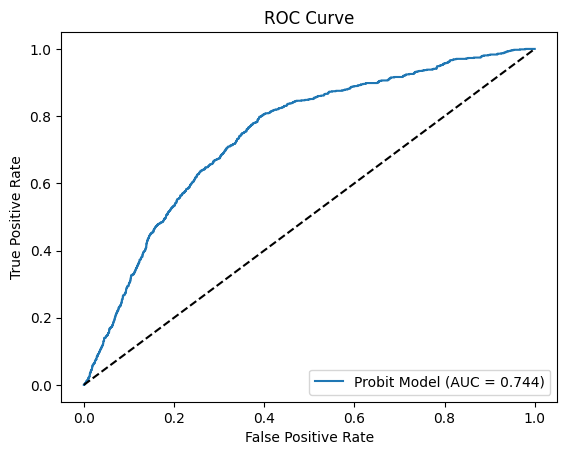

In [29]:
fpr, tpr, thresholds = roc_curve(y, probabilities)
plt.plot(fpr, tpr, label=f'Probit Model (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()